<a href="https://colab.research.google.com/github/Ilnurito/19-006/blob/main/cv_lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving миньоны.jpg to миньоны (31).jpg


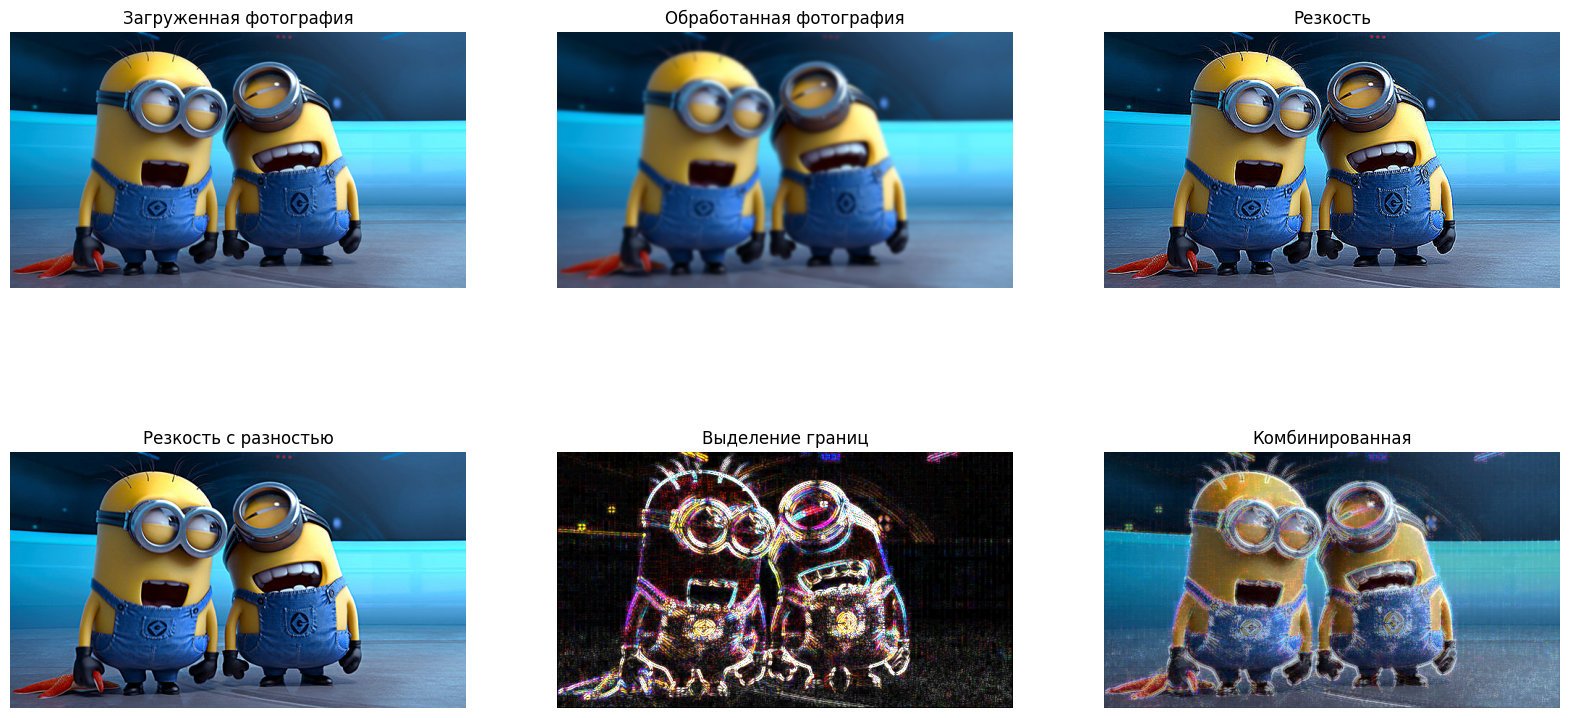

In [32]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

def show_images(titles, images):
    plt.figure(figsize=(20, 10))  # Изменяем размер фигуры для отображения в две строки
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Обрабатываем ее (размываем)
blurred_image = cv2.GaussianBlur(image_rgb, (11, 11), 0)
# Увеличиваем резкость
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image_rgb, -1, kernel)
# Разность размытого и качественного
sharpened_2 = cv2.addWeighted(image_rgb, 1.5, blurred_image, -0.5, 0)
# Выделение границ
edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)
# Отображаем изображение
# Комбинация картин
combined = cv2.addWeighted(sharpened_2, 0.5, edges, 1, 0)
combined = cv2.addWeighted(combined, 0.5, image_rgb, 0.5, 0)

titles = ['Загруженная фотография', 'Обработанная фотография', 'Резкость', 'Резкость с разностью', 'Выделение границ', 'Комбинированная']
images = [image_rgb, blurred_image, sharpened, sharpened_2, edges, combined]

show_images(titles, images)